In [4]:
import zipfile

In [7]:
DATA_IN_PATH = '/Users/jeon-yewon/Desktop/데이터 분석 강의/부트캠프/11주차/'

In [8]:
file_list = ['train.csv.zip', 'test.csv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [11]:
print(len(train_data))

404290


In [12]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [13]:
print('총 질문의 수 : ', len(np.unique(train_set)))
print('중복된 질문의 수 : ', np.sum(train_set.value_counts() > 1))

총 질문의 수 :  537361
중복된 질문의 수 :  111873


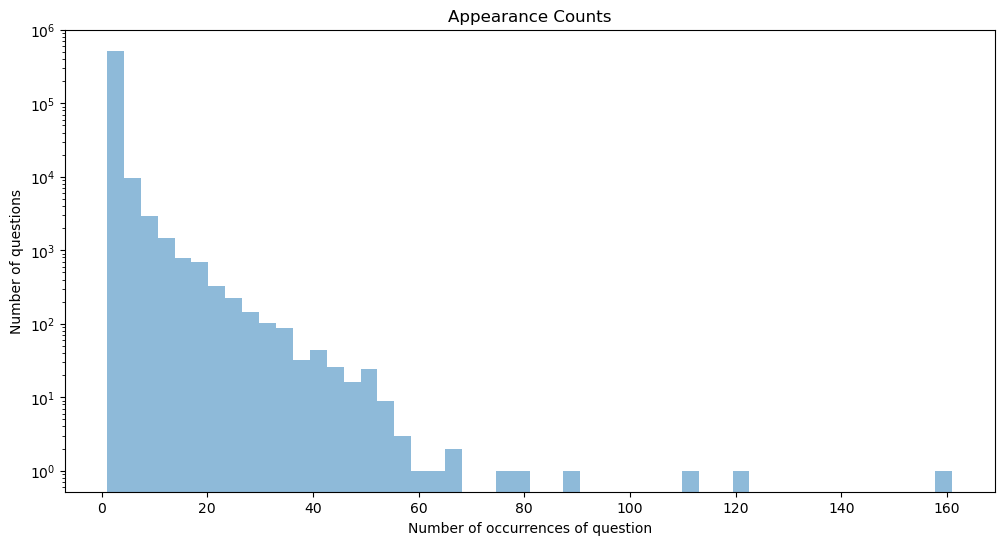

In [14]:
plt.figure(figsize=(12,6))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5)
plt.yscale('log')
plt.title('Appearance Counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')
plt.show()

In [15]:
print(train_set.value_counts())

What are the best ways to lose weight?                                                    161
How can you look at someone's private Instagram account without following them?           120
How can I lose weight quickly?                                                            111
What's the easiest way to make money online?                                               88
Can you see who views your Instagram?                                                      79
                                                                                         ... 
Should I buy my iPhone from the Apple Store or from my cellphone service provider?          1
How much do toucans eat in a day? What do they eat?                                         1
Is it a logical move for Kiip.me to grow their business on the Mountain Lion platform?      1
Is Hla b27 curable?                                                                         1
What is it like to have sex with your cousin?               

In [16]:
print('중복 최대 개수 :',np.max(train_set.value_counts()))
print('중복 최소 개수 :',np.min(train_set.value_counts()))
print('중복 평균 개수 :',np.mean(train_set.value_counts()))
print('중복 표준 편차 :',np.std(train_set.value_counts()))
print('중복 중간 개수 :',np.median(train_set.value_counts()))

중복 최대 개수 : 161
중복 최소 개수 : 1
중복 평균 개수 : 1.50472401234924
중복 표준 편차 : 1.9114373539452214
중복 중간 개수 : 1.0


In [17]:
print(np.percentile(train_set.value_counts(), 75))
print(np.percentile(train_set.value_counts(), 95))

1.0
3.0


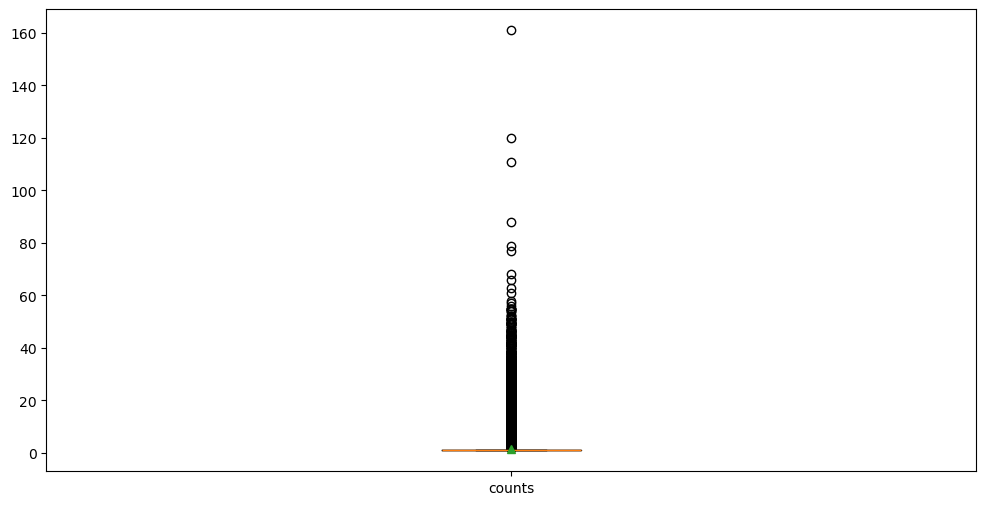

In [18]:
plt.figure(figsize=(12,6))
plt.boxplot([train_set.value_counts()], labels=['counts'], showmeans=True)
plt.show()

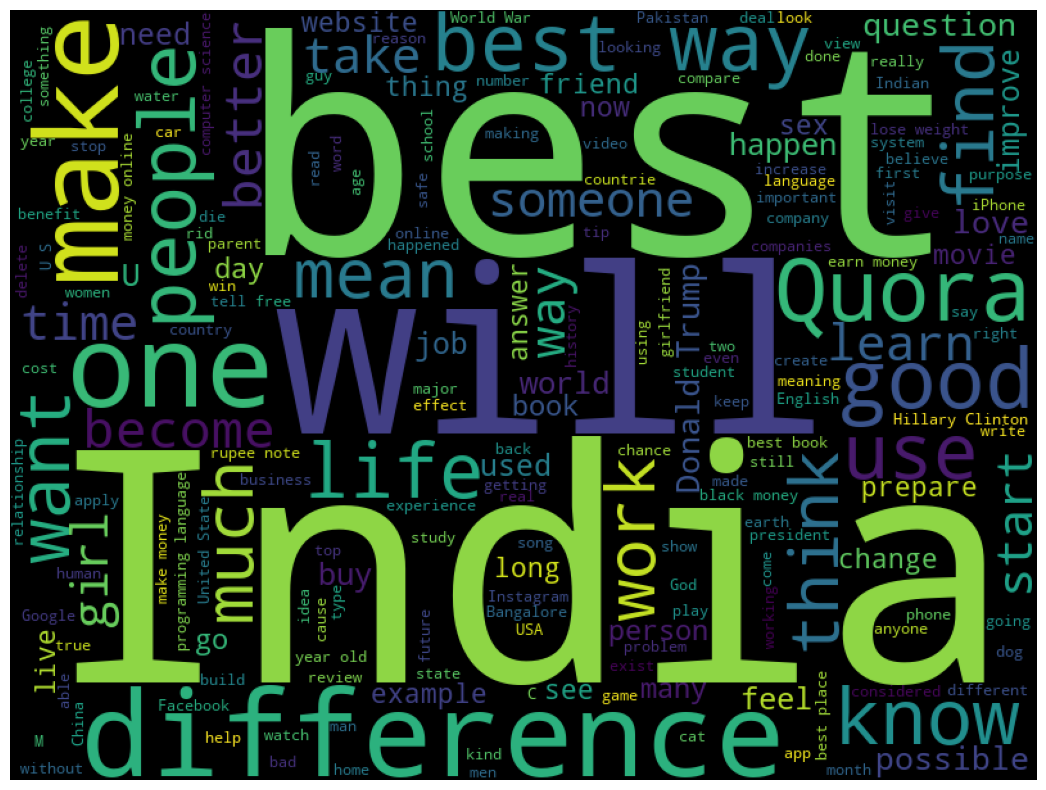

In [19]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(' '.join(train_set.astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [20]:
value_counts = train_data['is_duplicate'].value_counts()
print(value_counts)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64


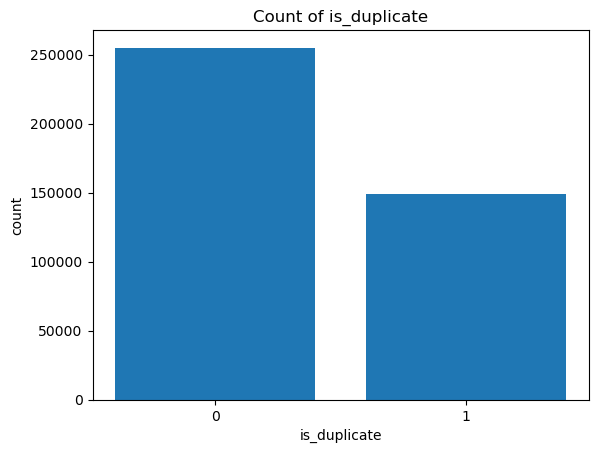

In [21]:
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('is_duplicate')
plt.ylabel('count')
plt.title('Count of is_duplicate')
plt.xticks(value_counts.index)
plt.show()

In [22]:
train_length = train_set.apply(len)

In [23]:
len(train_data['question1'][0]), train_length[0]

(66, 66)

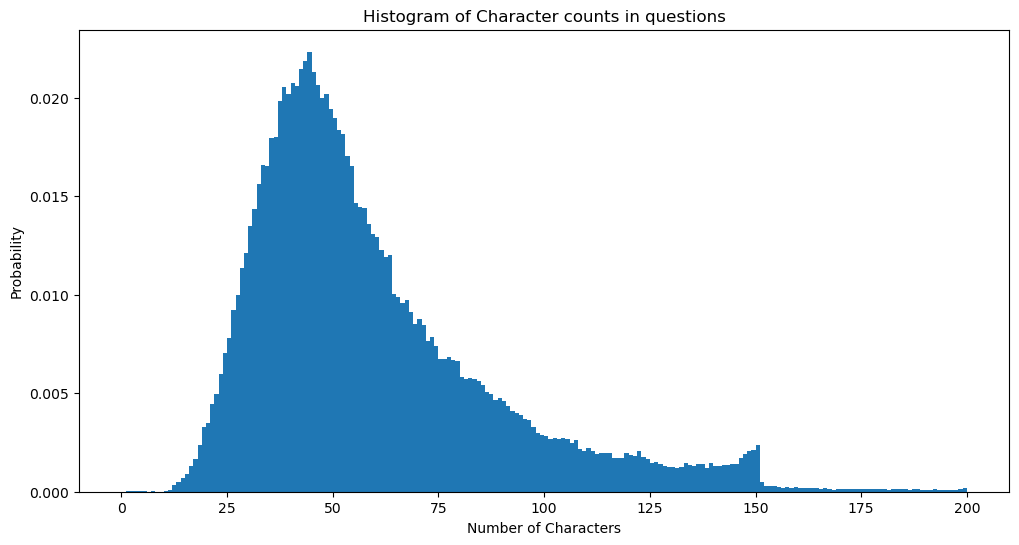

In [24]:
plt.figure(figsize=(12,6))
plt.hist(train_length, bins=200, range=[0,200], density=True)
plt.title('Histogram of Character counts in questions')
plt.xlabel('Number of Characters')
plt.ylabel('Probability')
plt.show()

In [25]:
print('질문 최대 길이 :',np.max(train_length))
print('질문 평균 길이 :',np.mean(train_length))
print('질문 표준 편차 :',np.std(train_length))
print('질문 중간 길이 :',np.median(train_length))

질문 최대 길이 : 1169
질문 평균 길이 : 59.82254817086745
질문 표준 편차 : 31.963731729209687
질문 중간 길이 : 51.0


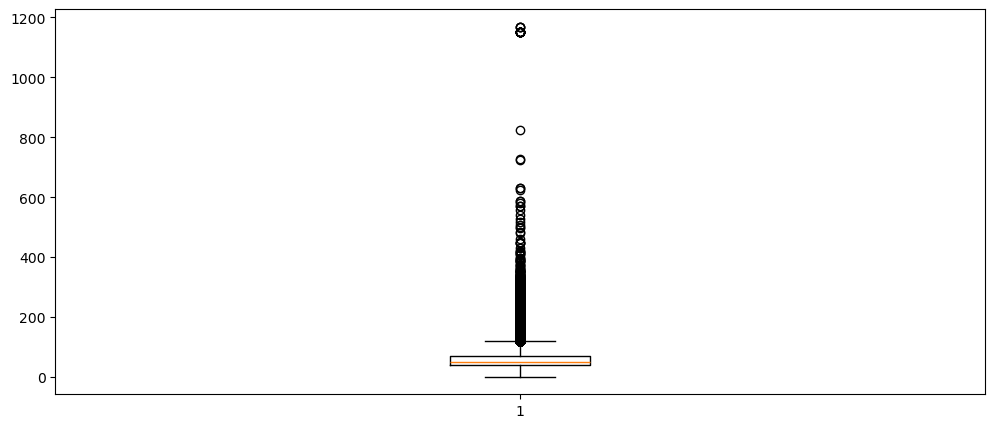

In [26]:
plt.figure(figsize=(12,5))

plt.boxplot(train_length)
plt.show()

In [27]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))
train_word_counts.head()

0    14
1     8
2    14
3    11
4    13
dtype: int64

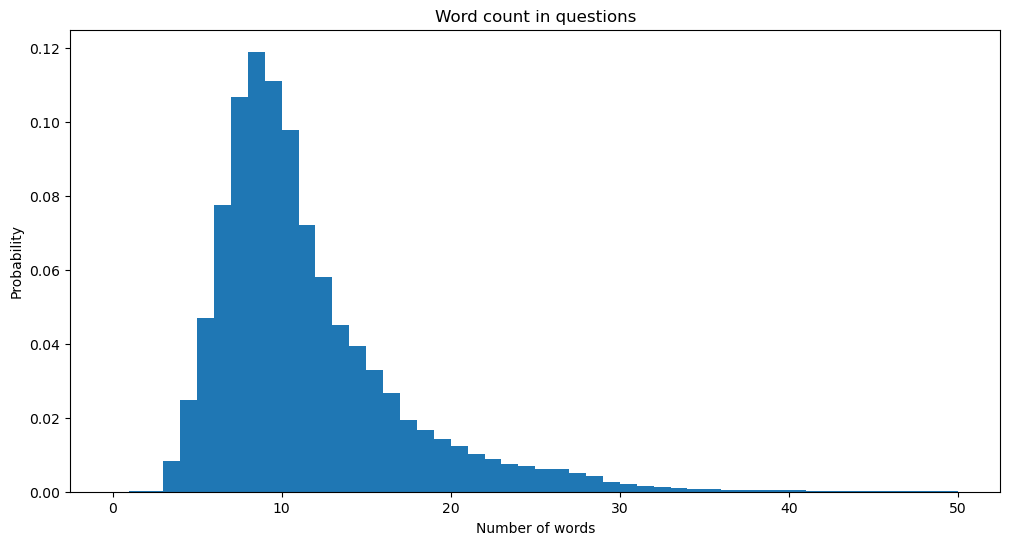

In [28]:
plt.figure(figsize=(12,6))
plt.hist(train_word_counts, bins=50, range=[0,50], density=True)
plt.title('Word count in questions')
plt.xlabel('Number of words')
plt.ylabel('Probability')
plt.show()

In [29]:
print('단어 최대 개수 :',np.max(train_word_counts))
print('단어 평균 개수 :',np.mean(train_word_counts))
print('단어 표준 편차 :',np.std(train_word_counts))
print('단어 중간 개수 :',np.median(train_word_counts))

단어 최대 개수 : 237
단어 평균 개수 : 11.064855672908061
단어 표준 편차 : 5.889164008512459
단어 중간 개수 : 10.0


In [30]:
print(np.percentile(train_word_counts, 99))

31.0


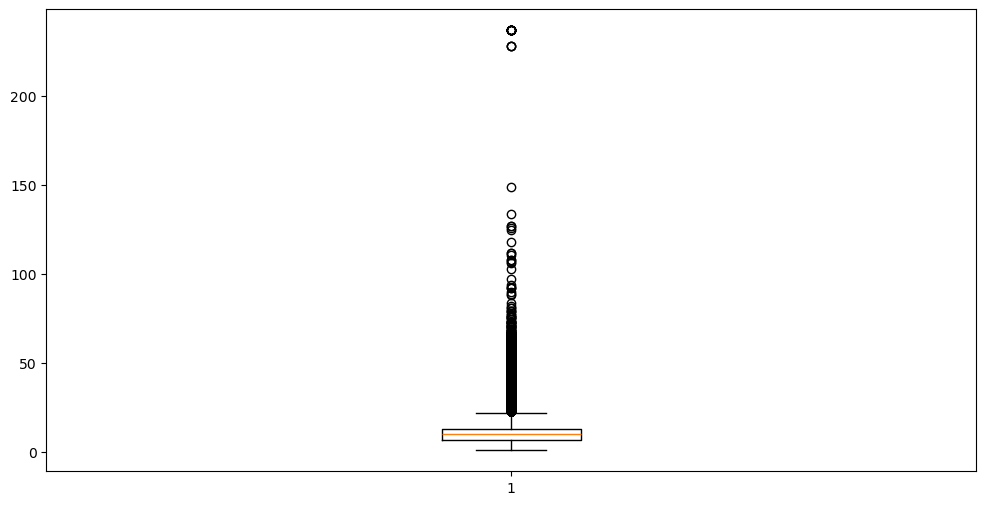

In [31]:
plt.figure(figsize=(12,6))
plt.boxplot(train_word_counts)
plt.show()

In [32]:
print('물음표가 있는 질문 : {:.2f}%'.format(np.mean(train_set.apply(lambda x: '?' in x))*100))
print('수학 태그가 있는 질문 : {:.2f}%'.format(np.mean(train_set.apply(lambda x: '[math]' in x))*100))
print('마침표가 있는 질문 : {:.2f}%'.format(np.mean(train_set.apply(lambda x: '.' in x))*100))
print('첫 글자가 대문자인 질문 : {:.2f}%'.format(np.mean(train_set.apply(lambda x: x[0].isupper()))*100))
print('숫자가 포함되어 있는 질문 : {:.2f}%'.format(np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x])))*100))

물음표가 있는 질문 : 99.87%
수학 태그가 있는 질문 : 0.12%
마침표가 있는 질문 : 6.31%
첫 글자가 대문자인 질문 : 99.81%
숫자가 포함되어 있는 질문 : 11.83%


In [33]:
import re
import json

In [34]:
MAX_SEQUENCE_LENGTH = 31
FILTERS = "([~.,!?\"':;)(])"

change_filter = re.compile(FILTERS)

In [35]:
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

In [36]:
train_neg_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [37]:
len(train_pos_data), len(train_neg_data)

(149263, 255027)

In [38]:
class_difference = len(train_neg_data) - len(train_pos_data)
sample_frac = 1 - (class_difference / len(train_neg_data)) # 샘플링 비율

sample_frac

0.5852831268846044

In [39]:
train_neg_data = train_neg_data.sample(frac = sample_frac)

In [40]:
len(train_pos_data), len(train_neg_data)

(149263, 149263)

In [41]:
train_data = pd.concat([train_neg_data, train_pos_data])

In [42]:
questions1 = [str(s) for s in train_data['question1']]
questions2 = [str(s) for s in train_data['question2']]

filtered_questions1 = []
filtered_questions2 = []

for q in questions1:
    filtered_questions1.append(re.sub(change_filter, '', q).lower())

for q in questions2:
    filtered_questions2.append(re.sub(change_filter, '', q).lower())

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)

In [45]:
questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)

In [46]:
questions1_sequence[0], questions2_sequence[0]

([60, 34098, 1, 187, 895, 10, 15137, 15138],
 [3, 5118, 1, 1532, 10, 15137, 15138])

In [47]:
q1_data = pad_sequences(questions1_sequence, padding='post', maxlen=MAX_SEQUENCE_LENGTH)
q2_data = pad_sequences(questions2_sequence, padding='post', maxlen=MAX_SEQUENCE_LENGTH)

In [48]:
q1_data[0], q2_data[0]

(array([   60, 34098,     1,   187,   895,    10, 15137, 15138,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0], dtype=int32),
 array([    3,  5118,     1,  1532,    10, 15137, 15138,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0], dtype=int32))

In [49]:
word_vocab = {}
word_vocab = tokenizer.word_index
word_vocab['<PAD>'] = 0

print('사전 크기 : ', len(word_vocab))

사전 크기 :  76415


In [50]:
labels = np.array(train_data['is_duplicate'], dtype=int)

print('Question 1 : ', q1_data.shape)
print('Question 2 : ', q2_data.shape)
print('Duplicate : ', labels.shape)

Question 1 :  (298526, 31)
Question 2 :  (298526, 31)
Duplicate :  (298526,)


In [51]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [52]:
train_q1_data = 'train_q1.npy'
train_q2_data = 'train_q2.npy'
train_label_data = 'train_label.npy'
data_configs = 'data_configs.json'

np.save(open(DATA_IN_PATH + train_q1_data, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + train_q2_data, 'wb'), q2_data)
np.save(open(DATA_IN_PATH + train_label_data, 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + data_configs, 'w'))

In [53]:
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')
len(test_data)

/var/folders/mr/zpw8mcz14pj_gkyqs4k_zl4c0000gn/T/ipykernel_1286/643980581.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')


3563475

In [54]:
test_data.drop(test_data.tail(1000000).index, inplace=True) # 뒤에 백만개 데이터 삭제
len(test_data)

2563475

In [55]:
test_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [56]:
valid_ids = [type(x) == int for x in test_data.test_id]
test_data = test_data[valid_ids].drop_duplicates()
len(test_data)

2097152

In [57]:
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = []
filtered_test_questions2 = []

for q in test_questions1:
    filtered_test_questions1.append(re.sub(change_filter, '', q).lower())

for q in test_questions2:
    filtered_test_questions2.append(re.sub(change_filter, '', q).lower())

In [58]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1 = pad_sequences(test_questions1_sequence, padding='post', maxlen=MAX_SEQUENCE_LENGTH)
test_q2 = pad_sequences(test_questions2_sequence, padding='post', maxlen=MAX_SEQUENCE_LENGTH)

In [59]:
test_id = np.array(test_data['test_id'])

print('Question 1 :', test_q1.shape)
print('Question 2 :', test_q2.shape)
print('I D :', test_id.shape)

Question 1 : (2097152, 31)
Question 2 : (2097152, 31)
I D : (2097152,)


In [60]:
test_q1_data = 'test_q1.npy'
test_q2_data = 'test_q2.npy'
test_id_data = 'test_id.npy'

np.save(open(DATA_IN_PATH + test_q1_data, 'wb'), test_q1)
np.save(open(DATA_IN_PATH + test_q2_data, 'wb'), test_q2)
np.save(open(DATA_IN_PATH + test_id_data, 'wb'), test_id)

In [61]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [62]:
conda install xgboost

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/jeon-yewon/miniforge3/envs/tensorflow

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          13 KB
    libxgboost-2.0.3           |       h313beb8_0         2.8 MB
    py-xgboost-2.0.3           |   py39hca03da5_0         267 KB
    xgboost-2.0.3              |   py39hca03da5_0          11 KB
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/osx-arm64::_py-xgboost-mutex-2.0-cpu_0 
  libxgboost         pkgs/main/osx-arm64::libxgboost-2.0.3-h313beb8_0 
  py-xgboost         pkgs/main/osx-arm64::py-xgboost-2.0.3-py

In [1]:
import xgboost

In [2]:
import xgboost as xgb